<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-размера-выборки" data-toc-modified-id="Исследование-размера-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование размера выборки</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-распределения-возраста" data-toc-modified-id="Исследование-распределения-возраста-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование распределения возраста</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Визуализация данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

# Определение возраста покупателей

## Подключение библиотек 

In [1]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

!pip install seaborn -U
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)


## Исследовательский анализ данных

### Исследование размера выборки 

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [3]:
features, target = next(train_gen_flow)

print(features.shape)# выводим 16 изображений
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout() 

(32, 224, 224, 3)


In [4]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


#### Вывод

Выборка содержит 7591 трех канальных фотографии (RGB) размером 224 на 224 пикселя

### Исследование распределения возраста 

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


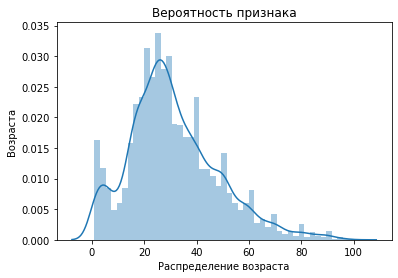

In [5]:
sns.distplot(labels['real_age'], label='ultra');

plt.xlabel('Распределение возраста')### Исследование распределения возраста 
plt.ylabel('Возраста')
plt.title('Вероятность признака')

plt.show()

#### Вывод

Видно, что возраст начинается с нуля. Больше всего фотографий людей в возрасте от 20 до 50 лет, а затем количество фотографий уменьшается. В наборе данных нет ни одной фотографии человека старше 120 лет. Такое распределение возраста на фотографиях полностью соответствует нашему интуитивному представлению о возрасте в реальной жизни. 

### Визуализация данных 

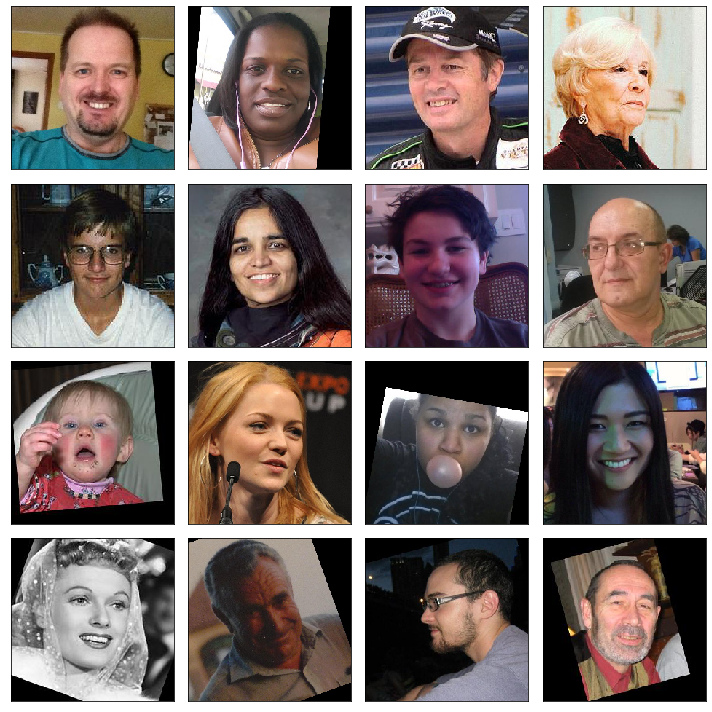

In [6]:
# выводим 16 изображений
fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    # для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

#### Вывод

Набор данных содержит фотографии людей разного возраста и с разных ракурсов. В него включены как черно-белые, так и цветные фотографии, все они довольно высокого качества.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd


def load_train(path):
    labels = pd.read_csv('/datasets/faces/labels.csv')

    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1. / 255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow


def load_test(path):
    labels = pd.read_csv('/datasets/faces/labels.csv')

    validation_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1. / 255)

    validation_gen_flow = validation_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return validation_gen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(units=1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mse',
                  metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

```

Epoch 1/5
178/178 - 50s - loss: 222.5165 - mae: 10.6846 - val_loss: 941.8627 - val_mae: 25.8998
Epoch 2/5
178/178 - 41s - loss: 60.4040 - mae: 5.8785 - val_loss: 858.4711 - val_mae: 24.3538
Epoch 3/5
178/178 - 41s - loss: 29.3751 - mae: 4.1969 - val_loss: 230.5529 - val_mae: 11.0841
Epoch 4/5
178/178 - 41s - loss: 18.1542 - mae: 3.2896 - val_loss: 120.3385 - val_mae: 8.2040
Epoch 5/5
178/178 - 41s - loss: 15.1671 - mae: 2.9984 - val_loss: 75.8249 - val_mae: 6.6172
60/60 - 10s - loss: 75.8249 - mae: 6.6172
Test MAE: 6.6172



```

## Анализ обученной модели

Входе данной работы была написана нейронная сеть по определению возраста человека. Для тренировки использовался набор данных состоящий из 7591 трех канальных фотографии (RGB) размером 224 на 224 пикселя. Распределения целевого признака в этом наборе данных полностью соответствует нашему интуитивному пониманию возраста человека. Итоговая модель показала качество  равное 6.6172 MAE на тестовой выборки, что полностью соответствует заявленным требованиям. 